In [28]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Load model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Load Support Data
with open("test_data.pkl", "rb") as f:
    test = pickle.load(f)

In [30]:
# Ensure that 'date' is in datetime format
test['date'] = pd.to_datetime(test['date'])

In [31]:
# Forecast the next 4 weeks using the forecast method
n_future_weeks = 4
future_price_mean = [55,56,58,58]  # Define Average Price in future weeks

In [32]:
# Create DataFrame for future exogenous variables
future_exog_vars = pd.DataFrame(future_price_mean, columns=['price_mean'])

# Forecast the future units sold
forecast = model.forecast(steps=n_future_weeks, exog=future_exog_vars)

# Ensure test.index[-1] is a Timestamp and then add Timedelta for weekly forecast
last_date = test['date'].iloc[-1]  # Last date from the 'date' column
forecast_index = pd.date_range(start=last_date + pd.Timedelta(weeks=1), 
                               periods=n_future_weeks, freq='W')


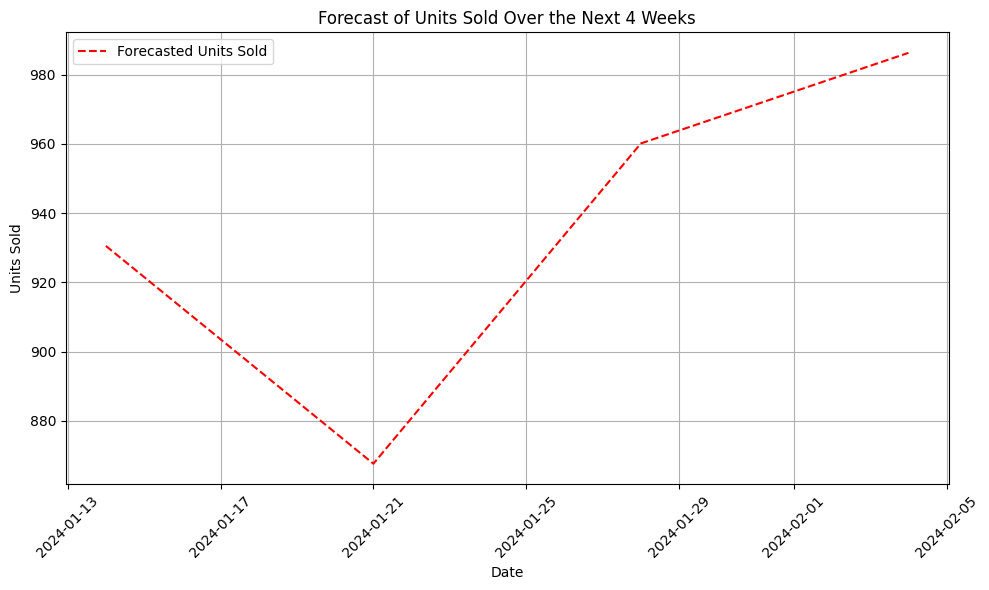

In [33]:
# Create a plot
plt.figure(figsize=(10, 6))

# Plot forecasted values for the next 4 weeks
plt.plot(forecast_index, forecast, label='Forecasted Units Sold', color='red', linestyle='--')

# Labels and title
plt.title('Forecast of Units Sold Over the Next 4 Weeks')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
forecast

87    930.523852
88    867.612733
89    960.141130
90    986.298547
Name: predicted_mean, dtype: float64